In [3]:
import json

# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('C:\\Users\\musta\\OneDrive\\Documents\\School\\DATA320\\Detecting Outliers\\Mustafa_Secrets.json') as f:
    data = json.load(f)

    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
    secret_key=data["mongodb"]

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 71 characters in length.


In [4]:
import pymongo
import certifi

# Once you have retrieved your connection string from a secrets file, use it here
mongo_connection_string = data['mongodb']

# Connect to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DATA320"
da320_database = client['DATA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['imDB', 'metacritic']


In [5]:
import pandas as pd
import re

# Filter data for one year
year_filter = {'release_date': re.compile(r'2001')}

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["imDB"].find(year_filter)

# Convert this information into a Pandas dataframe
imDB = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imDB.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652af26ff2896fb51996419a,265086,Black Hawk Down,144.0,7.7,390546,R,12/18/2001,92000000.0,193021.0,172989651.0,"Action, Drama, History, War","Josh Hartnett, Ewan McGregor, Tom Sizemore, Er...",Ridley Scott,"Jerry Bruckheimer, Harry Humphries, Branko Lus...","Revolution Studios, Jerry Bruckheimer Films, S..."
1,652af26ff2896fb51996419b,221027,Blow,124.0,7.5,257778,R,3/29/2001,53000000.0,12443461.0,83282296.0,"Biography, Crime, Drama","Johnny Depp, Penélope Cruz, Franka Potente, Ra...",Ted Demme,"Michael De Luca, Ted Demme, Tracy Falco, Georg...","Apostle, Avery Pix, New Line Cinema, Spanky Pi..."
2,652af26ff2896fb51996419c,245429,Spirited Away,125.0,8.6,737091,PG,7/20/2001,19000000.0,NaN,274925095.0,"Animation, Adventure, Family, Fantasy, Mystery","Rumi Hiiragi, Miyu Irino, Mari Natsuki, Takash...",Hayao Miyazaki,"Hironori Aihara, Donald W. Ernst, Ryoichi Fuku...","Tokuma Shoten, Studio Ghibli, Nippon Televisio..."
3,652af26ff2896fb51996419d,203009,Moulin Rouge!,127.0,7.6,281555,PG-13,5/9/2001,50000000.0,NaN,179213434.0,"Drama, Musical, Romance","Nicole Kidman, Ewan McGregor, John Leguizamo, ...",Baz Luhrmann,"Steve E. Andrews, Fred Baron, Martin Brown, Ca...","Twentieth Century Fox, Bazmark Films"
4,652af26ff2896fb51996419e,268978,A Beautiful Mind,135.0,8.2,914581,TV-14::(TV rating),12/13/2001,58000000.0,2501096.0,313542341.0,"Biography, Drama","Russell Crowe, Ed Harris, Jennifer Connelly, C...",Ron Howard,"Brian Grazer, Todd Hallowell, Ron Howard, Kare...","Universal Pictures, Dreamworks Pictures, Imagi..."


In [11]:
import pandas

# A bunch of numbers in a Pandas dataframe
movies = pandas.DataFrame({
    "title": ["Black Hawk Down","Blow","Spirited Away","Moulin Rouge!","A Beautiful Mind","Donnie Darko"
,"Jurassic Park III","Harry Potter and the Sorcerer's Stone","The Lord of the Rings: The Fellowship of the Ring","Mulholland Drive","The Fast and the Furious","Intimacy","Ocean's Eleven","Not Another Teen Movie","Wet Hot American Summer","Shrek","Vanilla Sky","Monsters, Inc.","Training Day","Pearl Harbor"],
    "runtime": ["144","124","125","127","135","113","92","152","178","147","106","119","116","89","97","90","136",'92','122','183']
})

# Extract the years from the pandas dataframe
movies["release_dates"] = pandas.to_datetime(movies.release_dates, errors='coerce')
movies["release_year"] = movies["release_dates"].dt.year
subset = movies[movies["release_year"] == 2001]
subset.head()

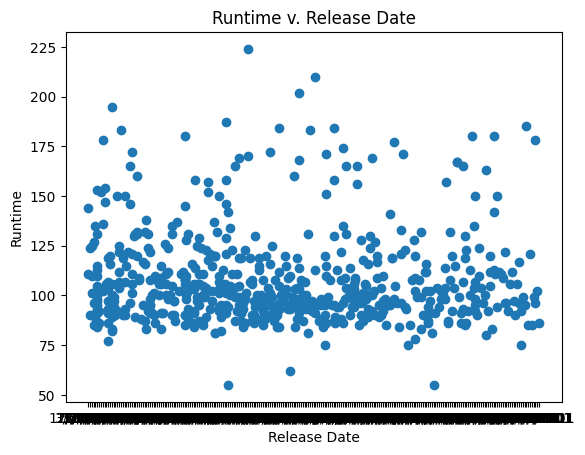

In [ ]:
from matplotlib import pyplot

# Plot release date by runtime
pyplot.title('Runtime v. Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(imDB['release_date'],imDB['runtime'])
pyplot.show()